# What are the must-have skills for the top 3 trending data roles?

In [36]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [7]:
df_us = df[df['job_country'] == 'United States']
df_skills = df_us.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [13]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

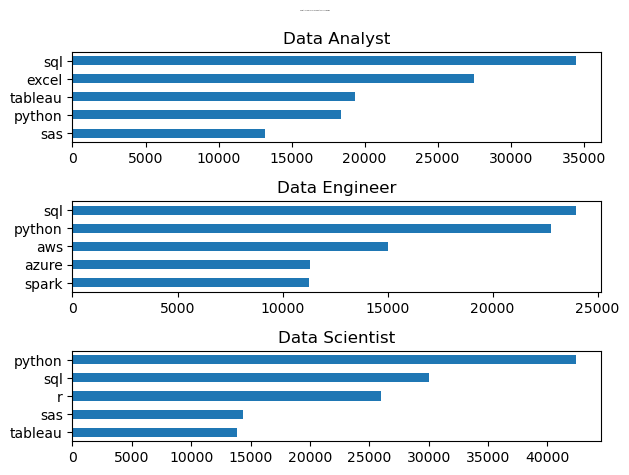

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    df_plot[::-1].plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Count of Top Skills in Top trending Roles', fontsize=15)
fig.tight_layout()
plt.show()

In [ ]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

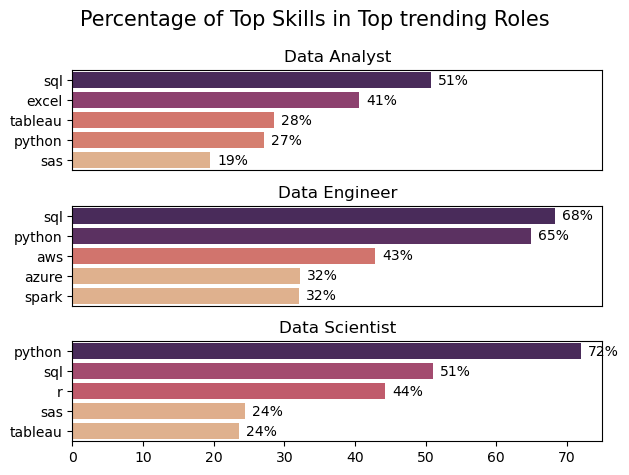

In [58]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills',ax=ax[i], hue='skill_count', palette='flare')
    ax[i].set_title(title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 75)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


    
fig.suptitle('Percentage of Top Skills in Top trending Roles', fontsize=15)
fig.tight_layout()
plt.show()